# Business Understanding

The dataset that we will examine is the 2017 US Census data. This data was collected to understand the population of the US by measuring for each tract location the demographic make up, the types of jobs, the type of transportation, and the levels of poverty. We are interested in identifying the tracts that have below median level of poverty. Accuracy, precision, and recall will be used to measure the effectiveness of a prediction algorithm.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

df = pd.read_csv('c:\School Stuff\DS\Machine Learning I\cardio_train_comma.csv')
print(df)

%matplotlib inline

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
5          8  21914       1     151    67.0    120     80            2     2   
6          9  22113       1     157    93.0    130     80            3     1   
7         12  22584       2     178    95.0    130     90            3     3   
8         13  17668       1     158    71.0    110     70            1     1   
9         14  19834       1     164    68.0    110     60            1     1   
10        15  22530       1     169    80.0    120     80            1     1   
11        16  18815       2     173    6

In [2]:

df['BMI'] = df['weight']/((df['height']/100)**2)
df['ageyr'] = df['age']/360
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ageyr
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,51.091667
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,56.188889
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,52.380556
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48.952778
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,48.538889


# Data Meaning Type

<b>Age in Years</b>
<br><b>BMI</b>:  
<b> BMI Classification </b>
<b>Blood Pressure Classifications</b>
<b>Glucose Classification</b>
<br><b>Cholesterol Classification</b>

df.age.min()  


# Data Quality

In [3]:
df=df.loc[(df.ap_lo>60) & (df.ap_lo<120) & (df.ap_hi<200) & (df.ap_hi>90) & (df.weight>45) & (df.weight<300) & (df.height<200) & (df.height>130)]
df.shape

(64944, 15)

# Simple Statistics

# Visualize Attributes

# Explore Joint Attributes

# Explore Attributes & Class

In [4]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df['age_yr'] = df['age']/360
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,ageyr,age_yr
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,51.091667,51.091667
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,56.188889,56.188889
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,52.380556,52.380556
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,48.952778,48.952778
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,60.872222,60.872222


In [ ]:
bc=sns.violinplot(x="age_yr", y="cardio",  palette="muted",data=df)
bc.set_title('Age and Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Gender (1=Female, 2=Male)')

Text(0.5, 0, 'Gender (1=Female, 2=Male)')

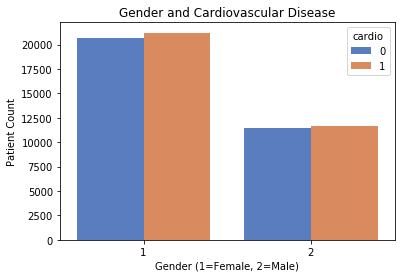

In [15]:
bc=sns.countplot(x="gender", hue="cardio",palette="muted",data=df)
bc.set_title('Gender and Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Gender (1=Female, 2=Male)')

Text(0.5, 0, 'Cholesterol (1=Normal, 2=Above Normal, 3=Well Above Normal)')

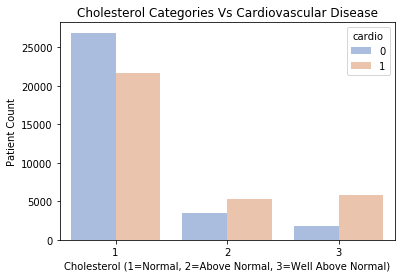

In [13]:
bc=sns.countplot(x="cholesterol", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Cholesterol Categories Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Cholesterol (1=Normal, 2=Above Normal, 3=Well Above Normal)')

Text(0.5, 0, 'Glucose (1=Normal, 2=Above Normal, 3=Well Above Normal)')

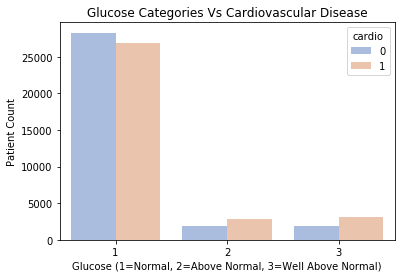

In [7]:
bc=sns.countplot(x="gluc", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Glucose Categories Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Glucose (1=Normal, 2=Above Normal, 3=Well Above Normal)')

Text(0.5, 0, 'Smoker')

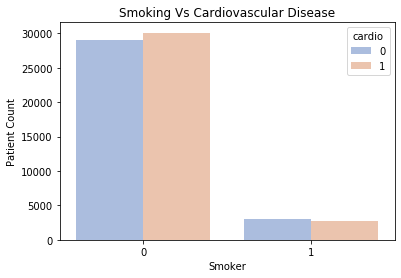

In [8]:
bc=sns.countplot(x="smoke", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Smoking Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Smoker')

Text(0.5, 0, 'Drinks Alcohol')

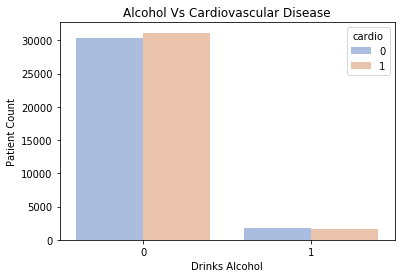

In [9]:
bc=sns.countplot(x="alco", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Alcohol Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Drinks Alcohol')

Text(0.5, 0, 'Active')

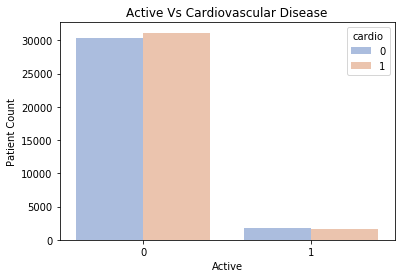

In [10]:
bc=sns.countplot(x="alco", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Active Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Active')

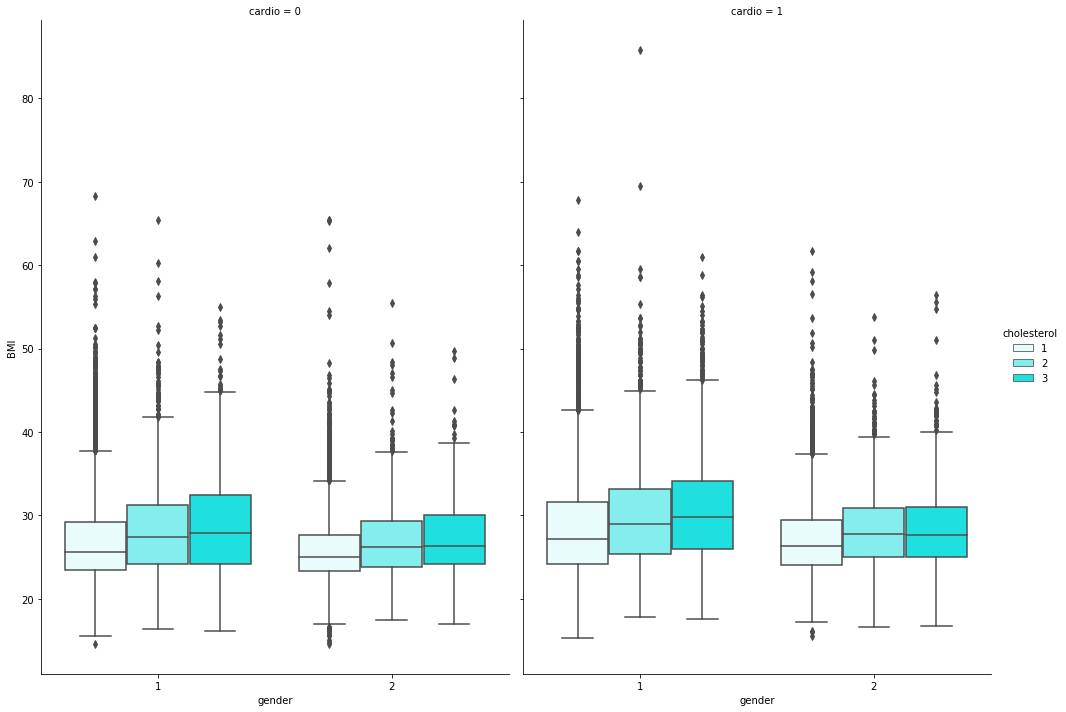

In [11]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="cholesterol", col="cardio", data=df, color = 'cyan',kind="box", height=10, aspect=.7);

In [ ]:
dff=df[(df.gender==1)]
dfm=df[(df.gender==2)]
dff.shape
dff.head()
dfm.shape
dfm.head()


In [ ]:
# Create high probability CVD frame
df_cvd_hi=df[(df.ap_lo>80) & (df.ap_hi>120) & (df.ageyr>54) & (df.gluc>1) & (df.cholesterol>1) & (df.height>130)]
df_cvd_him=dfm[(dfm.ap_lo>80) & (dfm.ap_hi>120) & (dfm.ageyr>54) & (dfm.gluc>1) & (dfm.cholesterol>1) & (dfm.height>130)]
df_cvd_hif=dff[(dff.ap_lo>80) & (dff.ap_hi>120) & (dff.ageyr>54) & (dff.gluc>1) & (dff.cholesterol>1) & (dff.height>130)]

In [ ]:
df_cvd_hi["cardio"].value_counts().plot(kind='pie')

# New Features

In [ ]:
df_cvd_hif["cardio"].value_counts().plot(kind='pie')

In [ ]:
df_cvd_him["cardio"].value_counts().plot(kind='pie')

In [ ]:
df_cvd_hi["cardio"].value_counts()

In [ ]:
df_cvd_him["cardio"].value_counts()

In [ ]:
df_cvd_hif["cardio"].value_counts()

In [ ]:
# Create high probability CVD frame
df_cvd_hi=df[(df.ap_lo>80) & (df.ap_hi>120) & (df.ageyr>54) & (df.gluc>1) & (df.cholesterol>1) & (df.BMI>30)]
 

In [ ]:
df_cvd_hi["cardio"].value_counts()


In [ ]:
df_cvd_hif["cardio"].value_counts().plot(kind='pie')

In [ ]:

df_cvd_him=dfm[(dfm.ap_lo>80) & (dfm.ap_hi>120) & (dfm.ageyr > 50) & (dfm.BMI > 35) & (dfm.smoke ==1) & (dfm.gluc>1) & (dfm.cholesterol>1) ]
df_cvd_hif=dff[(dff.ap_lo>80) &(dff.BMI > 35) & (dff.smoke ==1) & (dff.ap_hi>120) & (dff.ageyr>54) & (dff.gluc>1) & (dff.cholesterol>1) & (dff.height>130)]
df_cvd_him["cardio"].value_counts().plot(kind='pie')

In [ ]:
df_cvd_him 
df_cvd_him["cardio"].value_counts()

# Exceptional Work